In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('output_final.csv',skipinitialspace=True)

In [3]:
df.sample(3)

,Name,Condition,Price,Location,Link,Car_code
15140,Mercedes Benz SLC 43 AMG - 2017,Xe cũ,3 Tỷ 200 Triệu,Hà Nội,xe-mercedes_benz-slc-43-amg-2017-4155786,Mã: 4155786
7689,Hyundai Kona 1.6 Turbo - 2019,Xe cũ,660 Triệu,Vĩnh Phúc,xe-hyundai-kona-1.6-turbo-2019-4460291,Mã: 4460291
31498,Honda City 1.5 - 2018,Xe cũ,405 Triệu,Thái Nguyên,xe-honda-city-1.5-2018-4398122,Mã: 4398122


## Extract YEAR and Classify car brand

In [4]:
new = df['Name'].str.split("-",n=1,expand=True)
df['Year'] = new[1]
df['Car'] = new[0]
df.drop(columns=['Name'],inplace=True)


In [5]:
df['Final_link'] = "bonbanh.com/" + df['Link']
df.drop(columns=['Link'],inplace=True)

In [6]:
def car_classified(name):
    if 'Kia' in name:
        result = 'Kia'
    elif 'Toyota' in name:
        result = 'Toyota'
    elif 'Lexus' in name:
        result = 'Lexus'
    elif 'Volkswagen' in name:
        result = 'Toyota'
    elif 'BMW' in name:
        result = 'BMW'
    elif 'Rolls Royce' in name:
        result = 'Rolls Royce'
    elif 'Honda' in name:
        result = 'Honda'
    elif 'Ford' in name:
        result = 'Ford'
    elif 'Hyundai' in name:
        result = 'Hyundai'
    elif 'Nissan' in name:
        result = 'Nissan'
    elif 'Peugeot' in name:
        result = 'Peugeot'
    elif 'Suzuki' in name:
        result = 'Suzuki'
    elif 'Mercedes' in name:
        result = 'Mercedes Benz'
    elif 'Chevrolet' in name:
        result = 'Chevrolet'
    elif 'Mazda' in name:
        result = 'Mazda'
    elif 'Range Rover' in name:
        result = 'Range Rover'
    elif 'Mitsubishi' in name:
        result = 'Mitsubishi'
    elif 'VinFast' in name:
        result = 'VinFast'
    elif 'Porsche' in name:
        result = 'Porsche'
    elif 'Jaguar' in name:
        result = 'Jaguar'
    elif 'Volvo' in name:
        result = 'Volvo'
    elif 'Audi' in name:
        result = 'Audi'
    elif 'Bentley' in name:
        result = 'Bentley'
    elif 'Lamborghini' in name:
        result = 'Lamborghini'
    elif 'Ferrari' in name:
        result = 'Ferrari'
    else:
        result = 'Others'
    return result
df['Brand'] = df['Car'].apply(car_classified)

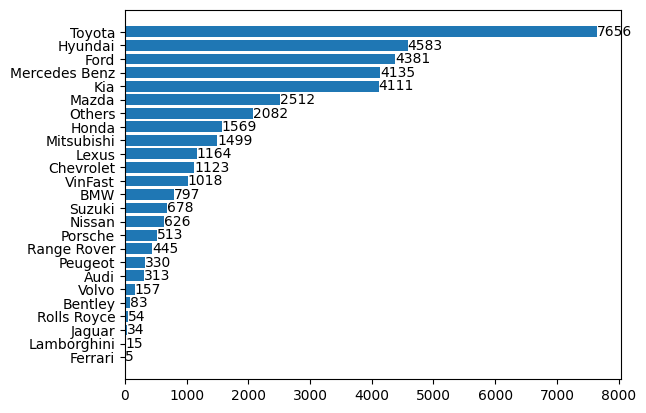

<Figure size 2000x1500 with 0 Axes>

In [7]:
number_ranking = df.groupby(df.Brand).size().sort_values(ascending=True)
d2 = number_ranking.to_frame(name='Count').reset_index()
fig, ax = plt.subplots()

bars = ax.barh(d2['Brand'], d2['Count'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

## Convert "Triệu" and "Tỷ" to 10^6 and 10^9 

In [8]:
def convert2pirce(text):
    if 'Tỷ' in text:
        num_bil = text.split(' Tỷ')[0]
        price = int(num_bil)*10e8 
        if 'Triệu' in text:
            num_mil = text.split(' Tỷ ')[1].split(' ')[0]
            price += int(num_mil)*10e5
        return str(price)
    else:
        return str(int(text.split(' ')[0])*10e5)

In [9]:
df['Price'] = df['Price'].apply(lambda x: f'{float(convert2pirce(x)):.3f}')

In [10]:
df.Price

0         9300000000.000
1         9999000000.000
2         4300000000.000
3        13900000000.000
4         4300000000.000
              ...       
39878       55000000.000
39879      220000000.000
39880      365000000.000
39881      385000000.000
39882      155000000.000
Name: Price, Length: 39883, dtype: object

In [11]:
#Remove dot 
df['Price'] = df['Price'].str.split(".", n=1).str[0]
df['Price'] = df['Price'].astype(float)

## How many old and new cars on the market

In [12]:
df.groupby('Condition').size()

Condition
Xe cũ     30458
Xe mới     9425
dtype: int64

## Convert PRICE to USD (1usd = 23.385vnd) and do analysis

In [13]:
df2 = df.copy()
df2.Price = df2.Price / 23385
df2.head(3)

,Condition,Price,Location,Car_code,Year,Car,Final_link,Brand
0,Xe cũ,397690.827453,TP HCM,Mã: 4461355,2020,LandRover Range Rover Autobiography LWB 3.0 I6,bonbanh.com/xe-landrover-range_rover-autobiogr...,Range Rover
1,Xe cũ,427581.783194,TP HCM,Mã: 4451716,2021,Porsche 911 Carrera S,bonbanh.com/xe-porsche-911-carrera-s-2021-4451716,Porsche
2,Xe cũ,183878.554629,TP HCM,Mã: 4405187,2022,Porsche Macan 2.0,bonbanh.com/xe-porsche-macan-2.0-2022-4405187,Porsche


In [14]:
df2['Price'] = df2['Price'].round()
df2['Price (USD)']  = df2['Price'] 
df2.drop('Price',axis=1,inplace=True) 

In [15]:
df2.sample(3)

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
34230,Xe cũ,Hà Nội,Mã: 4381237,2001,Mitsubishi Jolie MB,bonbanh.com/xe-mitsubishi-jolie-mb-2001-4381237,Mitsubishi,2780.0
37657,Xe cũ,Hải Dương,Mã: 4320412,2009,Toyota Innova G,bonbanh.com/xe-toyota-innova-g-2009-4320412,Toyota,10819.0
11717,Xe cũ,Hà Nội,Mã: 4423332,2004,Hyundai SantaFe Gold 2.0 AT 4WD,bonbanh.com/xe-hyundai-santafe-gold-2.0-at-4wd...,Hyundai,11332.0


In [16]:
d3 = df2.groupby('Brand')['Price (USD)'].mean().to_frame(name='Average price').reset_index()
d3['Average price']  = d3['Average price'].apply(lambda x: '%.2f' %x)


In [17]:
d3['Average price'] = d3['Average price'].astype(float)

In [18]:
d3.nlargest(5,'Average price')

,Brand,Average price
20,Rolls Royce,1023373.69
10,Lamborghini,829298.07
2,Bentley,469593.13
4,Ferrari,334830.00
18,Porsche,193982.50


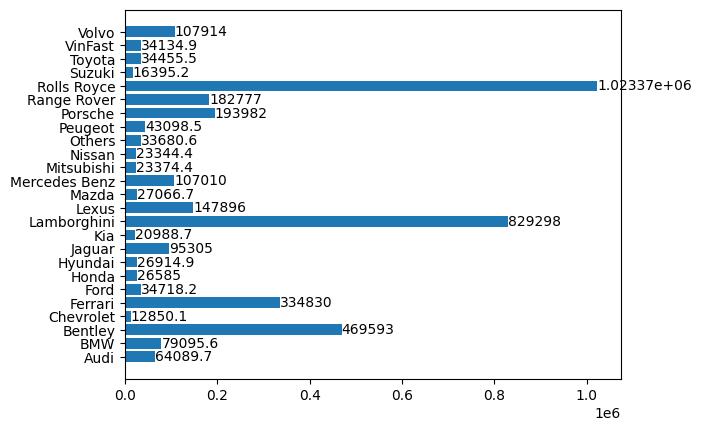

<Figure size 2000x1500 with 0 Axes>

In [19]:
fig, ax = plt.subplots()

bars = ax.barh(d3['Brand'], d3['Average price'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

## Top 10 most popular cars 

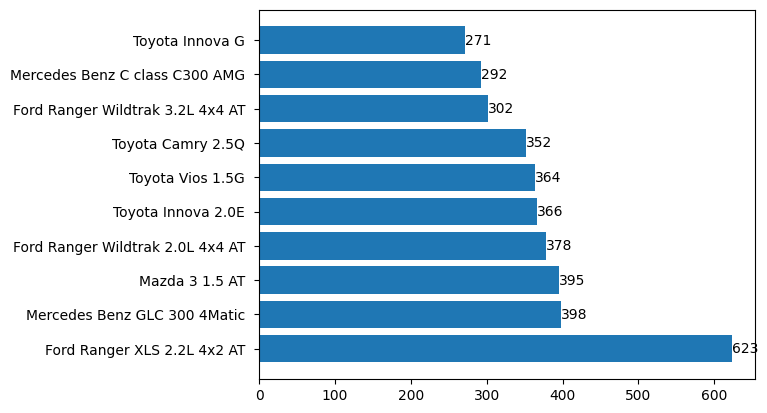

<Figure size 2000x1500 with 0 Axes>

In [20]:
popular_cars = df2.groupby('Car').size().sort_values(ascending=True).to_frame('Number').reset_index()
popular_cars_vsl  = popular_cars.nlargest(10,'Number')

fig, ax = plt.subplots()

bars = ax.barh(popular_cars_vsl['Car'], popular_cars_vsl['Number'])
ax.bar_label(bars)
plt.figure(figsize=(20,15))
plt.show()

In [21]:
d4 = popular_cars.sort_values(by=['Number'],ascending=False).head(10)
list_car = list(d4['Car'])
df3 = df2.copy()

In [22]:
list_car

['Ford Ranger XLS 2.2L 4x2 AT ',
 'Mercedes Benz GLC 300 4Matic ',
 'Mazda 3 1.5 AT ',
 'Ford Ranger Wildtrak 2.0L 4x4 AT ',
 'Toyota Innova 2.0E ',
 'Toyota Vios 1.5G ',
 'Toyota Camry 2.5Q ',
 'Ford Ranger Wildtrak 3.2L 4x4 AT ',
 'Mercedes Benz C class C300 AMG ',
 'Toyota Innova G ']

In [23]:
round(df3[df3['Car'].isin(list_car)].groupby('Car')['Price (USD)'].mean()) #Mean price of top 10 most popular cars in Vietnam

Car
Ford Ranger Wildtrak 2.0L 4x4 AT     38065.0
Ford Ranger Wildtrak 3.2L 4x4 AT     31897.0
Ford Ranger XLS 2.2L 4x2 AT          26950.0
Mazda 3 1.5 AT                       22323.0
Mercedes Benz C class C300 AMG       65336.0
Mercedes Benz GLC 300 4Matic         91697.0
Toyota Camry 2.5Q                    46266.0
Toyota Innova 2.0E                   20512.0
Toyota Innova G                      10837.0
Toyota Vios 1.5G                     19384.0
Name: Price (USD), dtype: float64

## Geography

In [24]:
df3.groupby('Location').size().sort_values(ascending=False)

Location
Hà Nội        19025
TP HCM         8146
Hải Phòng      1163
Bình Dương      882
Đăk Lăk         727
              ...  
Hậu Giang        14
Vĩnh Long        11
Lai Châu         10
Trà Vinh          8
Bạc Liêu          3
Length: 63, dtype: int64

## What is the most expensive car?

In [25]:
d5 = df3.sort_values(by=['Price (USD)'], ascending=False)

In [26]:
d5.head(5) #Top 5 most expensive car

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
11237,Xe mới,Hà Nội,Mã: 4234748,2022,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black-badg...,Rolls Royce,1838786.0
5404,Xe mới,Hà Nội,Mã: 4471155,2021,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black-badg...,Rolls Royce,1838786.0
22299,Xe mới,Hà Nội,Mã: 4269258,2022,Rolls Royce Cullinan Black Badge,bonbanh.com/xe-rolls_royce-cullinan-black--bad...,Rolls Royce,1837888.0
14876,Xe cũ,Hà Nội,Mã: 4479164,2021,Rolls Royce Ghost Series II EWB,bonbanh.com/xe-rolls_royce-ghost-series-ii-ewb...,Rolls Royce,1817404.0
20768,Xe cũ,Hà Nội,Mã: 4408913,2018,Rolls Royce Cullinan 6.75 V12,bonbanh.com/xe-rolls_royce-cullinan-6.75-v12-2...,Rolls Royce,1795595.0


In [27]:
d5.Location.unique()

array(['Hà Nội', 'TP HCM', 'Hải Dương', 'Quảng Ninh', 'Đà Nẵng',
       'Khánh Hòa', 'Bình Dương', 'Cần Thơ', 'Hải Phòng', 'Hà Nam',
       'Nghệ An', 'Phú Thọ', 'Đồng Nai', 'Ninh Bình', 'Vĩnh Phúc',
       'Bà Rịa Vũng Tàu', 'Hưng Yên', 'Thái Nguyên', 'Bắc Giang',
       'Lâm Đồng', 'Bình Định', 'Gia Lai', 'Kiên Giang', 'Tiền Giang',
       'Long An', 'Bắc Ninh', 'Lai Châu', 'Bình Phước', 'Thanh Hóa',
       'Bến Tre', 'Thừa Thiên Huế', 'Lào Cai', 'Tây Ninh', 'Bình Thuận',
       'Đăk Lăk', 'Ninh Thuận', 'Đồng Tháp', 'Cà Mau', 'Tuyên Quang',
       'Hòa Bình', 'An Giang', 'Nam Định', 'Sơn La', 'Kon Tum', 'Phú Yên',
       'Hà Giang', 'Lạng Sơn', 'Hà Tĩnh', 'Quảng Nam', 'Bạc Liêu',
       'Quảng Bình', 'Hậu Giang', 'Quảng Trị', 'Thái Bình', 'Sóc Trăng',
       'Đăk Nông', 'Cao Bằng', 'Điện Biên', 'Quảng Ngãi', 'Bắc Kạn',
       'Yên Bái', 'Vĩnh Long', 'Trà Vinh'], dtype=object)

In [28]:
d5[(d5['Brand'] == 'BMW') & (d5['Location'] == 'Hà Nội') & (d5['Price (USD)'].between(21358,42716))].sort_values(by = ['Year'],ascending=False).head(10) #từ 500tr - 1 tỷ

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
29475,Xe cũ,Hà Nội,Mã: 4447353,2017,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2017-4447353,BMW,40624.0
3684,Xe cũ,Hà Nội,Mã: 4440397,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4440397,BMW,42549.0
11950,Xe cũ,Hà Nội,Mã: 4322193,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4322193,BMW,40154.0
25532,Xe cũ,Hà Nội,Mã: 4466565,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4466565,BMW,38272.0
13094,Xe cũ,Hà Nội,Mã: 4258834,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4258834,BMW,38443.0
463,Xe cũ,Hà Nội,Mã: 4259516,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4259516,BMW,38443.0
1947,Xe cũ,Hà Nội,Mã: 4259504,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4259504,BMW,38443.0
4220,Xe cũ,Hà Nội,Mã: 4401387,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4401387,BMW,37631.0
37213,Xe cũ,Hà Nội,Mã: 4331387,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4331387,BMW,38914.0
18454,Xe cũ,Hà Nội,Mã: 4452939,2016,BMW 3 Series 320i,bonbanh.com/xe-bmw-3_series-320i-2016-4452939,BMW,39341.0


In [29]:
#d5['Year'] = d5['Year'].fillna(0)
d5[d5['Year'].str.contains("-",na=False)]

,Condition,Location,Car_code,Year,Car,Final_link,Brand,Price (USD)
8783,Xe cũ,TP HCM,Mã: 4497944,4 - 2015,Lamborghini Aventador LP 700,bonbanh.com/xe-lamborghini-aventador-lp-700-4-...,Lamborghini,641009.0
20446,Xe mới,TP HCM,Mã: 4501755,Spec 3.5 AT SH-AWD - 2022,Acura MDX A,bonbanh.com/xe-acura-mdx-a-spec-3.5-at-sh-awd-...,Others,295061.0
12902,Xe mới,Hà Nội,Mã: 2494847,Dynamic HSE 2.0 - 2019,LandRover Range Rover Velar R,bonbanh.com/xe-landrover-range_rover_velar-r-d...,Range Rover,235151.0
5888,Xe mới,Hà Nội,Mã: 2873302,Dynamic SE 2.0 - 2019,LandRover Range Rover Velar R,bonbanh.com/xe-landrover-range_rover_velar-r-d...,Range Rover,224032.0
13337,Xe cũ,Hà Nội,Mã: 4479673,Line Quattro - 2022,Audi Q8 55 TFSI S,bonbanh.com/xe-audi-q8-55-tfsi-s-line-quattro-...,Audi,222365.0
...,...,...,...,...,...,...,...,...
26597,Xe cũ,Phú Thọ,Mã: 4477946,5 4x2 MT - 2003,Ssangyong Korando TX,bonbanh.com/xe-ssangyong-korando-tx-5-4x2-mt-2...,Others,5773.0
13130,Xe cũ,Bắc Ninh,Mã: 4513162,spec 2.5 MT - 2004,Isuzu Hi lander V,bonbanh.com/xe-isuzu-hi_lander-v-spec-2.5-mt-2...,Others,5046.0
31956,Xe cũ,Tuyên Quang,Mã: 4415368,5 4x4 MT - 2002,Ssangyong Korando TX,bonbanh.com/xe-ssangyong-korando-tx-5-4x4-mt-2...,Others,4276.0
33789,Xe cũ,Lâm Đồng,Mã: 4387812,5 4x4 MT - 2000,Ssangyong Korando TX,bonbanh.com/xe-ssangyong-korando-tx-5-4x4-mt-2...,Others,3122.0
